<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/compare_eos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Calculation of density of gases
#@markdown Demonstration of ideal gas law and equations of state 
%%capture
!pip install py4j
!pip install --upgrade -q gspread
!rm -rf testneqsim
!git clone https://github.com/EvenSol/NeqSim-Colab.git
!cd NeqSim-Colab
!pip install neqsim==2.5.35-Colab/lib/neqsim-0.0.1-py3-none-any.whl
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

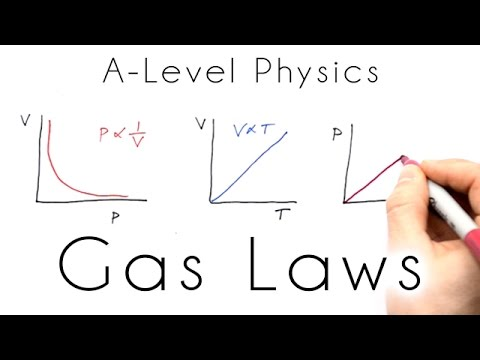

In [0]:
#@title Introduction to Gas Laws
#@markdown This video gives an intriduction to behavour of gases as function of pressure and temperature
from IPython.display import YouTubeVideo
YouTubeVideo('QhnlyHV8evY', width=600, height=400)

# Comparison of ideal gas and real gas behaviour

In the following example we use the ideal gas law and the SRK-EOS to calculate the density of methane.  At low pressure we see that the ideal gas and the real density are the same, at pressures higher than 20 bar the real gas density is higher, while at pressures higher than 350 bar the ideal gas density is the highest. THe reason for this is that at intermediate pressures, the atractive forces is dominating, while at very high pressures repulsive forces starts to dominate.

molar mass of  methane  is  16.043  kg/mol


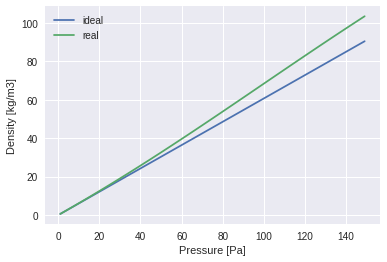

In [0]:
componentName = "methane" #@param ["methane", "ethane", "propane", "CO2", "nitrogen"]
temperature = 318.0   #@param {type:"number"}
minPressure = 1.0  #@param {type:"number"}
maxPressure = 150.0  #@param {type:"number"}
eosname = "pr" #@param ["srk", "pr"]
R = 8.314 # J/mol/K

# Creating a fluid in neqsim
fluid1 = fluid(eosname) #create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0) #adding 1 mole to the fluid
fluid1.init(0); 

print('molar mass of ', componentName, ' is ', fluid1.getMolarMass()*1000 , ' kg/mol')

def idealgasdensity(pressure, temperature):
  m3permol = R*temperature/(pressure*1e5)
  m3perkg = m3permol/fluid1.getMolarMass()
  return 1.0/m3perkg

def realgasdensity(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature)
    TPflash(fluid1)
    fluid1.initPhysicalProperties();
    return fluid1.getDensity('kg/m3')

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)
idealdensity = [idealgasdensity(P,temperature) for P in pressure]
realdensity = [realgasdensity(P,temperature) for P in pressure]

plt.plot(pressure, idealdensity)
plt.plot(pressure, realdensity)
plt.xlabel('Pressure [Pa]')
plt.ylabel('Density [kg/m3]')
plt.legend(['ideal', 'real'])

# Pressure of gas as function of volume

1 m3 methane at 1 bar and 25 C is compressed to 200 bar and cooled to 25 C. What is
the volume of the gas? What is the density of the compressed gas?

In [0]:
componentName = "methane" #@param ["methane", "ethane", "propane", "CO2", "nitrogen"]
temperature = 288.15   #@param {type:"number"}
initialVolume = 1.0  #@param {type:"number"}
initialPressure = 1.0  #@param {type:"number"}
endPressure = 200.0  #@param {type:"number"}
R = 8.314 # J/mol/K

initialMoles = initialPressure*1e5*1.0/(R*temperature)

# Creating a fluid in neqsim
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent(componentName, initialMoles) #adding 1 Sm3 to the fluid
fluid1.setTemperature(temperature)
fluid1.setPressure(initialPressure)
TPflash(fluid1)
fluid1.initPhysicalProperties()
startVolume = fluid1.getVolume('m3/sec')


print('initialVolume ', startVolume, 'm3')
print('initial gas density ', fluid1.getDensity('kg/m3'))
print('initial gas compressiility ', fluid1.getZ())
      
fluid1.setPressure(endPressure)
TPflash(fluid1)
fluid1.initPhysicalProperties()

endVolume = fluid1.getVolume('m3/sec')
print('end volume ', fluid1.getVolume('Sm3/sec'), 'm3')
print('volume ratio ', endVolume/startVolume)
print('end gas density ', fluid1.getDensity('kg/m3'))
print('end gas compressibility ', fluid1.getZ())

initialVolume  0.9981148410194175 m3
initial gas density  0.6709479366456967
initial gas compressiility  0.9980593679337882
end volume  0.004184485063379671 m3
volume ratio  0.004192388381988066
end gas density  161.13193946161053
end gas compressibility  0.8368504997319933


# Calculation of density of LNG
The density of liquified methane at the boiling point at atomspheric pressure can be calcuated as demonstrated in the following example

In [0]:
# Creating a fluid in neqsim
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 1.0)
fluid1.setTemperature(110.0)
fluid1.setPressure(1.01325)
bubt(fluid1)
fluid1.initPhysicalProperties()
print('temperature at boiling point ', fluid1.getTemperature()-273.15, 'C')
print('LNG density ', fluid1.getDensity('kg/m3'), ' kg/m3')


temperature at boiling point  -161.1441471052878 C
LNG density  428.1719693252967  kg/m3
